In [2]:
import pandas as pd

In [3]:
dataframe=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\daily-total-female-births-CA.csv")
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
#data types
dataframe['date'].dtype

dtype('O')

In [5]:
#we want date as date not string
df2=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\daily-total-female-births-CA.csv",parse_dates=[0])

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df2['date'].dtype

dtype('<M8[ns]')

In [8]:
df2.shape

(365, 2)

In [9]:
df2[(df2['date']>'1959-01-01')&(df2['date']<='1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


In [10]:
df2.describe()

,date,births
count,365,365.000000
mean,1959-07-02 00:00:00,41.980822
min,1959-01-01 00:00:00,23.000000
25%,1959-04-02 00:00:00,37.000000
50%,1959-07-02 00:00:00,42.000000
75%,1959-10-01 00:00:00,46.000000
max,1959-12-31 00:00:00,73.000000
std,NaN,7.348257


In [11]:
#feature engineering
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [12]:
features=df2.copy()

In [13]:
features['year']=df2['date'].dt.year

In [14]:
features['month']=df2['date'].dt.month

In [15]:
features['day']=df2['date'].dt.day

In [16]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [17]:
#lag features
features['lag1']=df2['births'].shift(1)

In [18]:
features['lag2']=df2['births'].shift(365)

In [19]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [20]:
#window features
features['roll_mean']=df2['births'].rolling(window=2).mean()

In [21]:

features['roll_max']=df2['births'].rolling(window=3).max()

In [22]:
features.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


In [23]:
#expanding features
features['expand_max']=df2['births'].expanding().max()
features.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


In [24]:
#downsampling and upsampling
miles_df=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\us-airlines-monthly-aircraft-miles-flown.csv",parse_dates=[0])

In [25]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [26]:
#downsampling----use keyword 'Q','A','W'....etc
#month to quarter

In [27]:
quarterly_miles_df=miles_df.resample('Q',on="Month").mean()

In [28]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [29]:
yearly_miles_df=miles_df.resample('A',on="Month").mean()
yearly_miles_df.head()

,MilesMM
Month,
1963-12-31,8300.250000
1964-12-31,8849.333333
1965-12-31,9619.250000
1966-12-31,9929.500000
1967-12-31,10542.916667


| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

upsampling

In [30]:
upsampled_miles_df=miles_df.resample('D',on='Month').mean()
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [31]:
#we are filling value lineranly to nan
interpolate_df=upsampled_miles_df.interpolate(method='linear')
interpolate_df.head(35)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<Axes: xlabel='Month'>

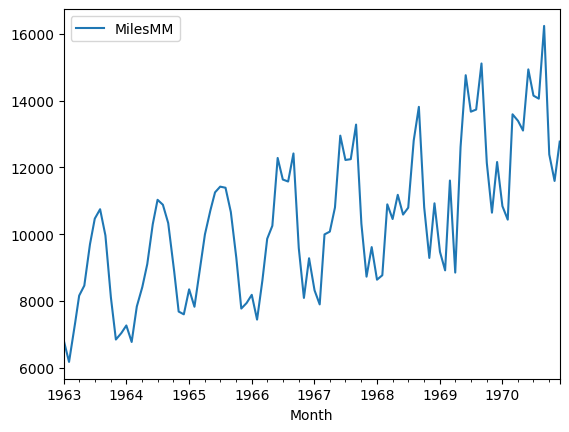

In [32]:
interpolate_df.plot()

In [33]:
#we are filling value lineranly to nan
poly_interpolate_df=upsampled_miles_df.interpolate(method='spline',order=2)
interpolate_df.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065


<Axes: xlabel='Month'>

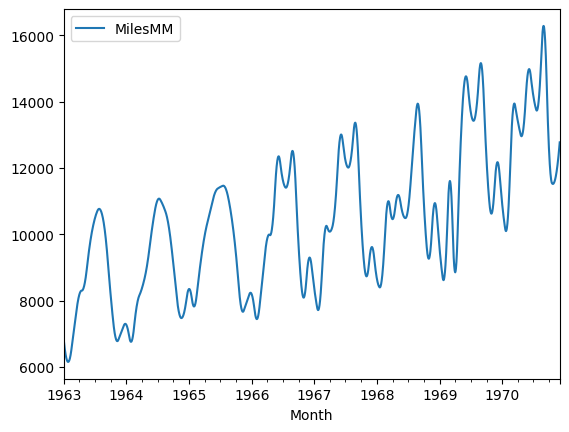

In [34]:
poly_interpolate_df.plot()

| Method  | Description                                               |
|---------|-----------------------------------------------------------|
| bfill   | Backward fill                                             |
| count   | Count of values                                           |
| ffill   | Forward fill                                              |
| first   | First valid data value                                    |
| last    | Last valid data value                                     |
| max     | Maximum data value                                        |
| mean    | Mean of values in time range                              |
| median  | Median of values in time range                            |
| min     | Minimum data value                                        |
| nunique | Number of unique values                                   |
| ohlc    | Opening value, highest value, lowest value, closing value |
| pad     | Same as forward fill                                      |
| std     | Standard deviation of values                              |
| sum     | Sum of values                                             |
| var     | Variance of values                                        |

data visualisation

In [35]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [36]:
from matplotlib import pyplot as plt

In [37]:
dataviz_df=df2.copy()

<Axes: >

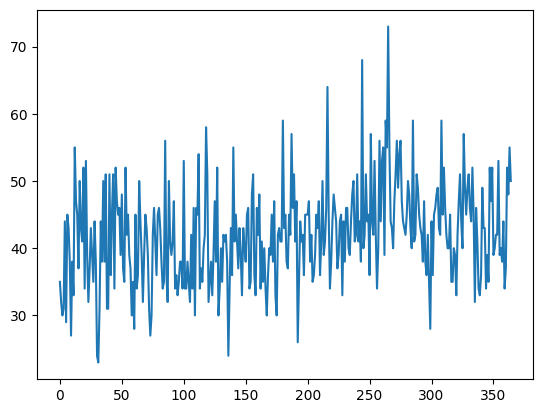

In [38]:
dataviz_df['births'].plot()

In [39]:
dataviz_df.index=dataviz_df['date']

<Axes: xlabel='date'>

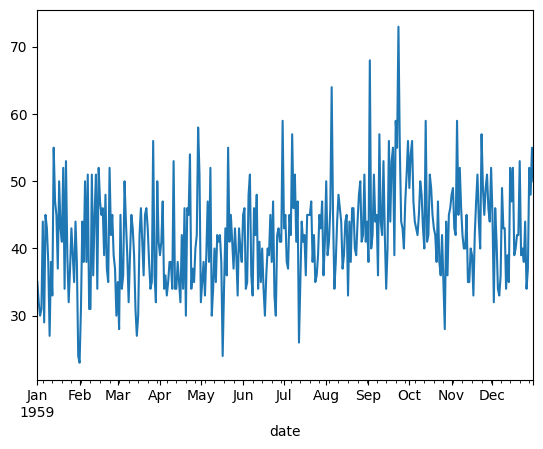

In [40]:
dataviz_df['births'].plot()

zooming in

In [41]:
dataviz_df2=dataviz_df[(dataviz_df['date']>'1959-01-01')&(dataviz_df['date']<='1959-01-10')].copy()

In [42]:
dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


<Axes: xlabel='date'>

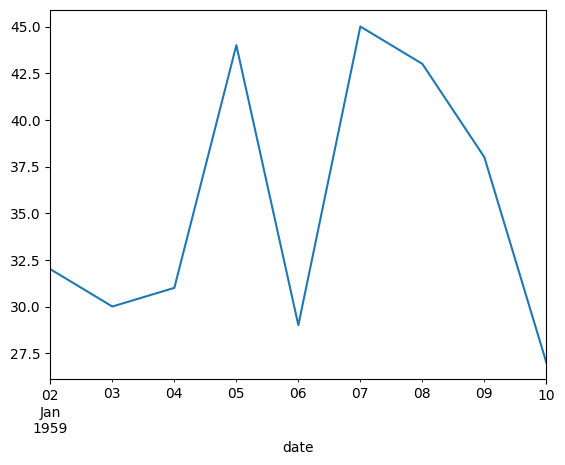

In [43]:
dataviz_df2['births'].plot()

trendline

In [44]:
import seaborn as sns

<Axes: ylabel='births'>

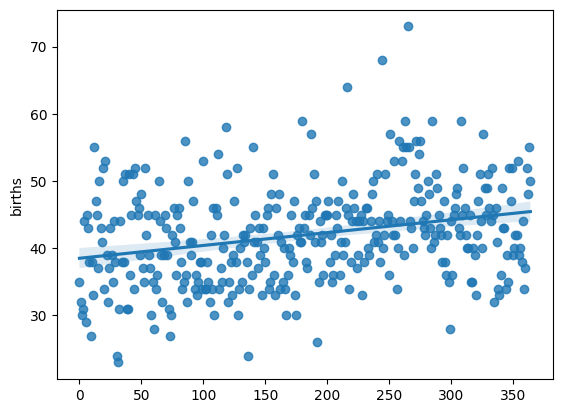

In [45]:
sns.regplot(x=df2.index.values,y=df2['births'])

<Axes: ylabel='births'>

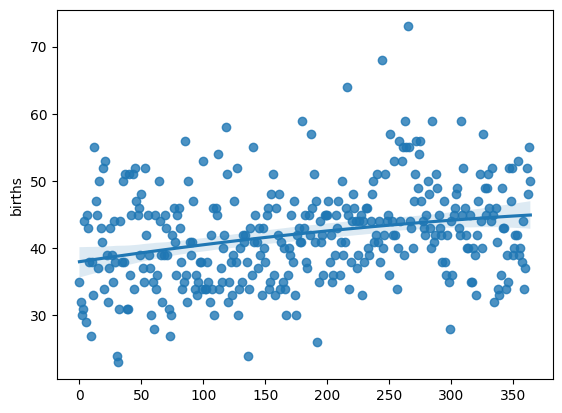

In [46]:
sns.regplot(x=df2.index.values,y=df2['births'],order=2) #order=2 means quadratic trend line ax2+bx+c

<Axes: ylabel='births'>

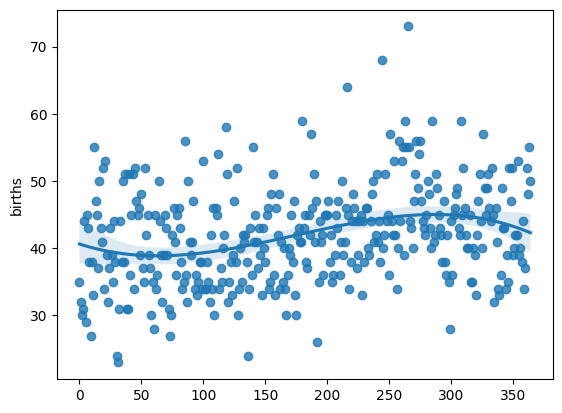

In [47]:
sns.regplot(x=df2.index.values,y=df2['births'],order=3) #order=2 means cubic trend line

In [48]:
miles_df=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\us-airlines-monthly-aircraft-miles-flown.csv",parse_dates=[0])
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<Axes: >

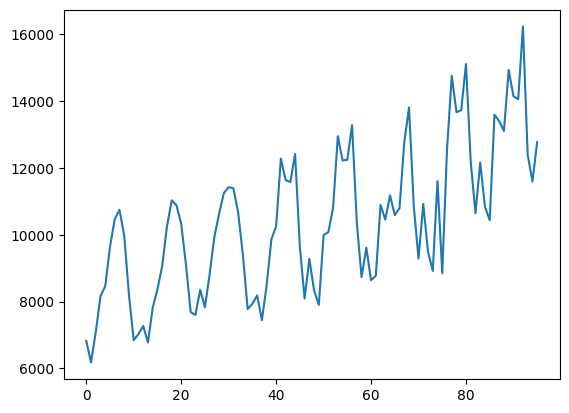

In [49]:
miles_df['MilesMM'].plot()

<Axes: ylabel='MilesMM'>

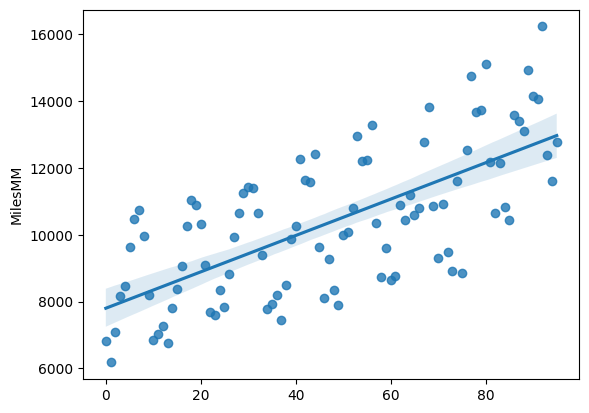

In [50]:
sns.regplot(x=miles_df.index.values,y=miles_df['MilesMM'])

<Axes: ylabel='MilesMM'>

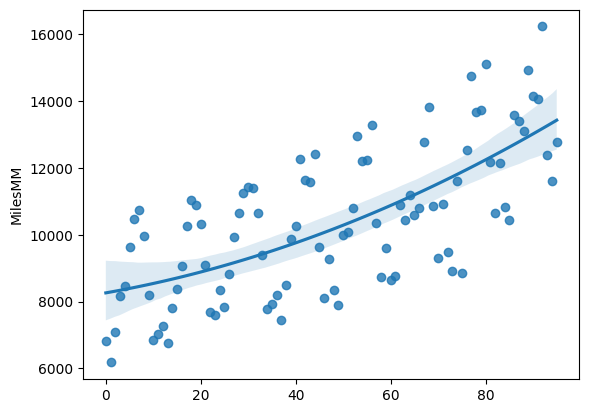

In [51]:
sns.regplot(x=miles_df.index.values,y=miles_df['MilesMM'],order=2)

removing seasonality

In [52]:
miles_df['year']=miles_df['Month'].dt.year

In [53]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [54]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

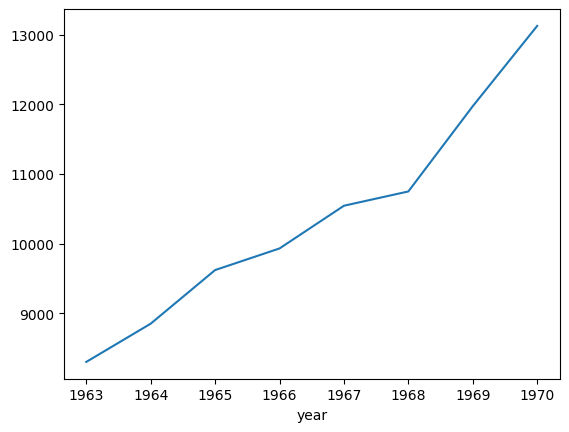

In [55]:
miles_df.groupby('year')['MilesMM'].mean().plot()

creating lag plot---will tell you that it is beneficial to include lag features

In [56]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [57]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

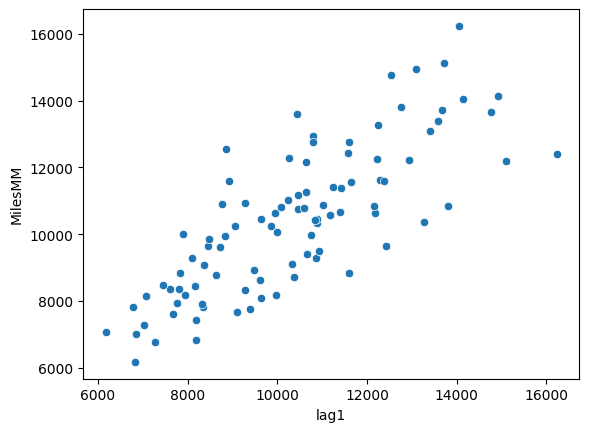

In [58]:
sns.scatterplot(x=miles_df['lag1'],y=miles_df['MilesMM'])

their is some positive correlation b/w lag1 and milesmm ...if lag1 value high then milesmm value are also high and vice versa

In [59]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

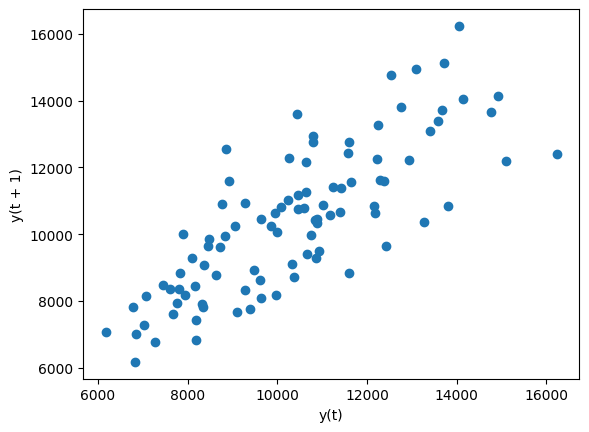

In [60]:
lag_plot(miles_df['MilesMM'])  #by default use lag-1

#auto corelation plot will give corr... b/w two lag values which is very imp..

In [61]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

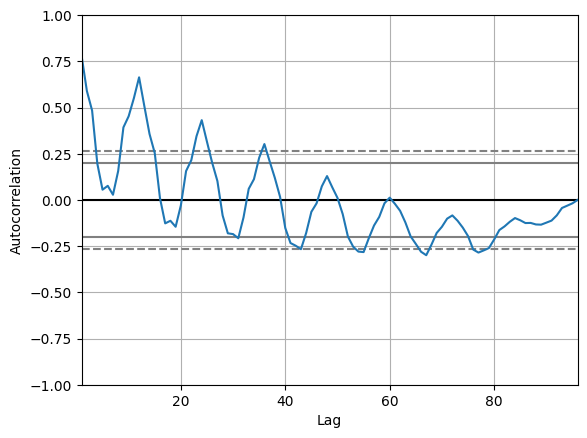

In [62]:
autocorrelation_plot(miles_df['MilesMM'])

Decomposing time series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
miles_decomp_df=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\us-airlines-monthly-aircraft-miles-flown.csv",parse_dates=[0])
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [65]:
miles_decomp_df.index=miles_decomp_df['Month']

In [66]:
miles_decomp_df.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [67]:
result=seasonal_decompose(miles_decomp_df['MilesMM'],model='additive')


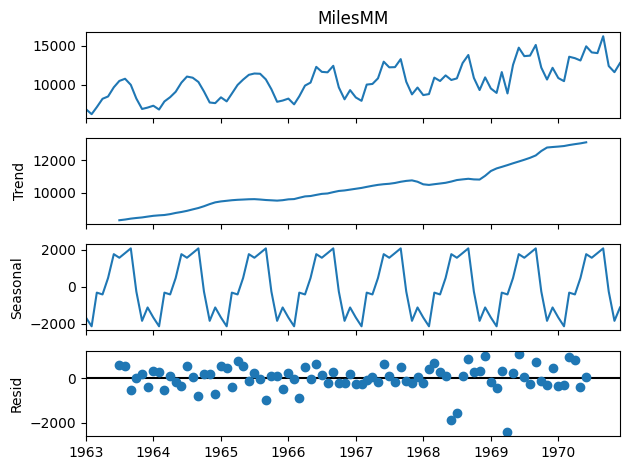

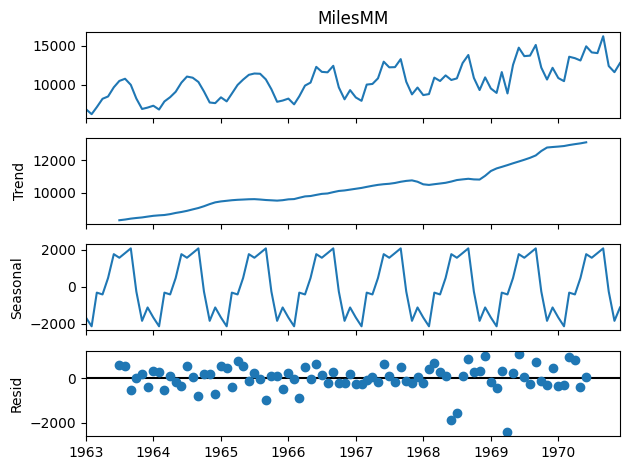

In [68]:
result.plot()

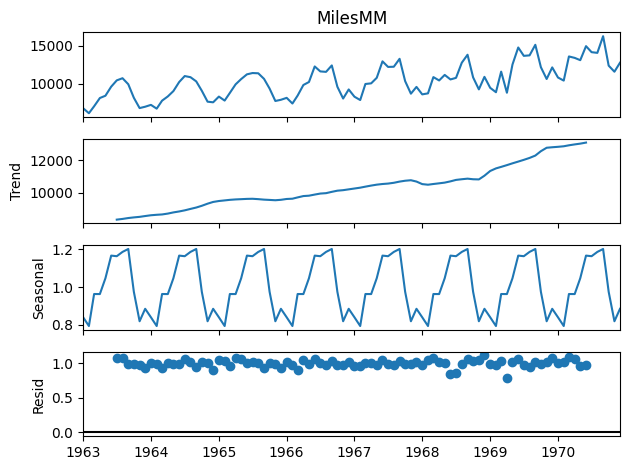

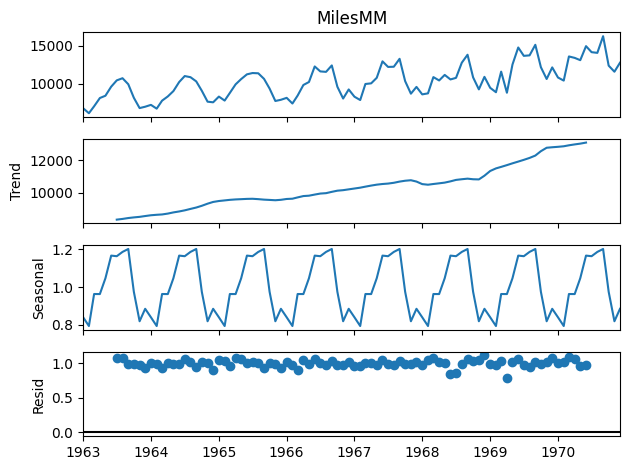

In [69]:
result2=seasonal_decompose(miles_decomp_df['MilesMM'],model='multiplicative')
result2.plot()

differncing

In [70]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


In [71]:
miles_df.drop(columns=['year'])

,Month,MilesMM,lag1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,6827.0
2,1963-03-01,7084,6178.0
3,1963-04-01,8162,7084.0
4,1963-05-01,8462,8162.0
...,...,...,...
91,1970-08-01,14057,14147.0
92,1970-09-01,16234,14057.0
93,1970-10-01,12389,16234.0
94,1970-11-01,11595,12389.0


In [72]:
#to remove trend lag1-milesmm
miles_df['MilesMM_diff_1']=miles_df['MilesMM'].diff(periods=1)

In [73]:
miles_df.head()

,Month,MilesMM,year,lag1,MilesMM_diff_1
0,1963-01-01,6827,1963,NaN,NaN
1,1963-02-01,6178,1963,6827.0,-649.0
2,1963-03-01,7084,1963,6178.0,906.0
3,1963-04-01,8162,1963,7084.0,1078.0
4,1963-05-01,8462,1963,8162.0,300.0


In [74]:
miles_df.index=miles_df['Month']

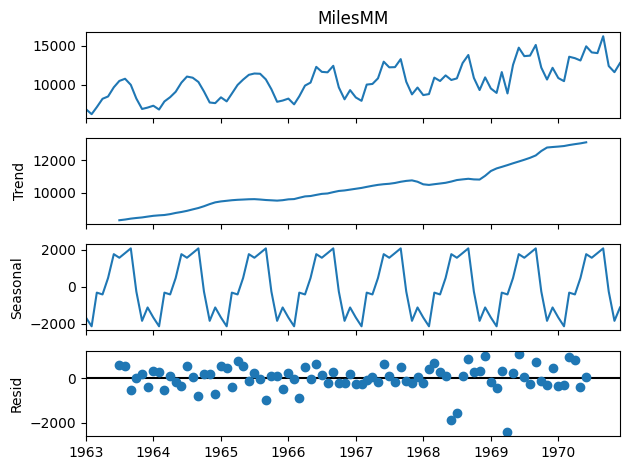

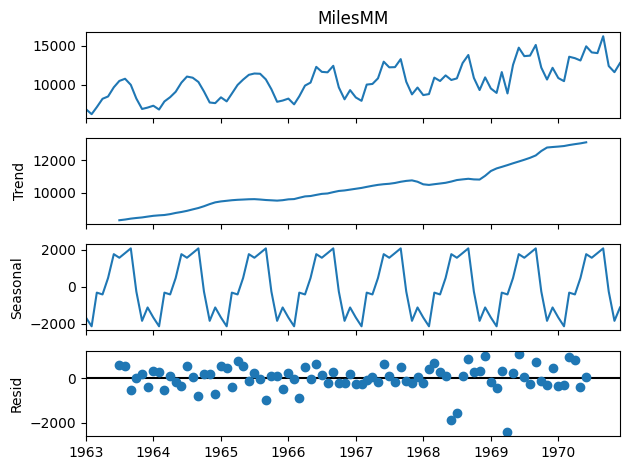

In [75]:
result_a=seasonal_decompose(miles_df['MilesMM'],model='additive')
result_a.plot()

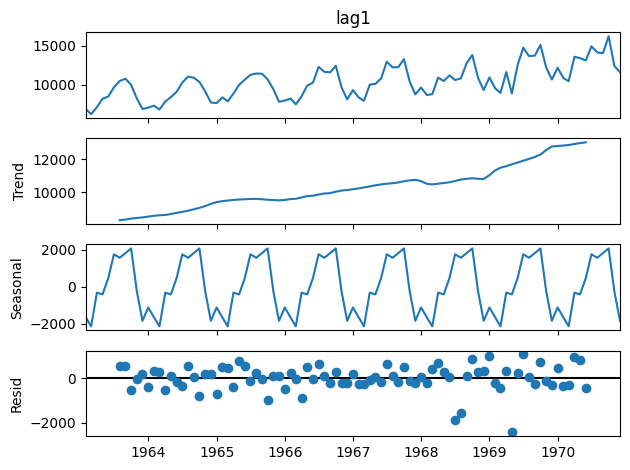

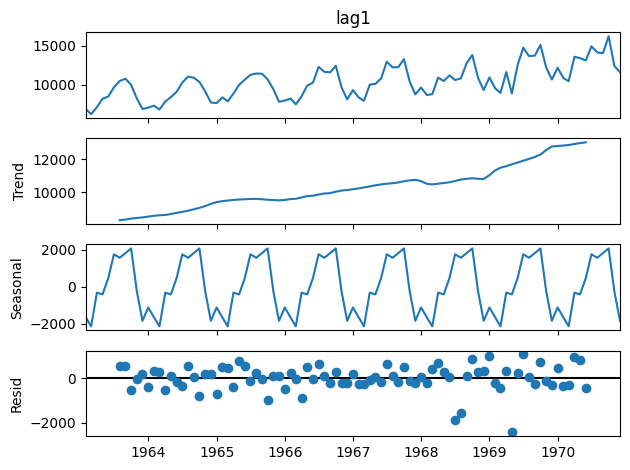

In [76]:
miles_df.index=miles_df['Month']
result_b=seasonal_decompose(miles_df.iloc[1:,3],model='additive')
result_b.plot()

in above we are trying to remove trend

<Axes: xlabel='Month'>

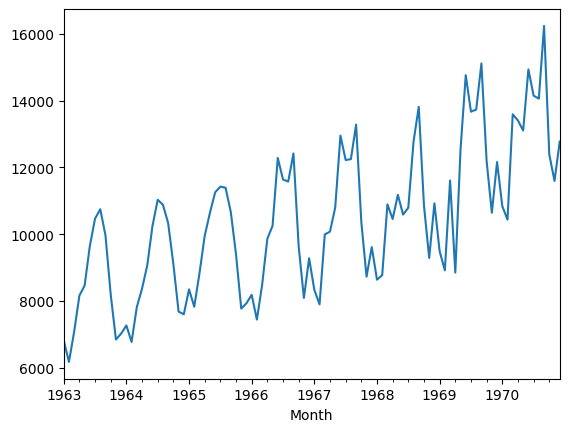

In [77]:
#now we will try to remove seasonality
miles_df['MilesMM'].plot()

<Axes: xlabel='Month'>

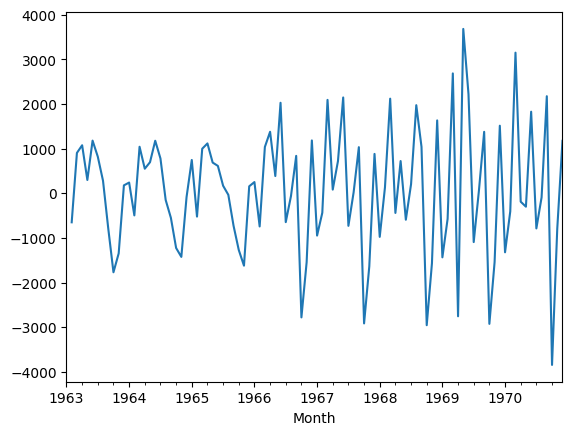

In [78]:
miles_df['MilesMM_diff_1'].plot()

In [79]:
miles_df['MilesMM_diff_12']=miles_df['MilesMM_diff_1'].diff(periods=12)

<Axes: xlabel='Month'>

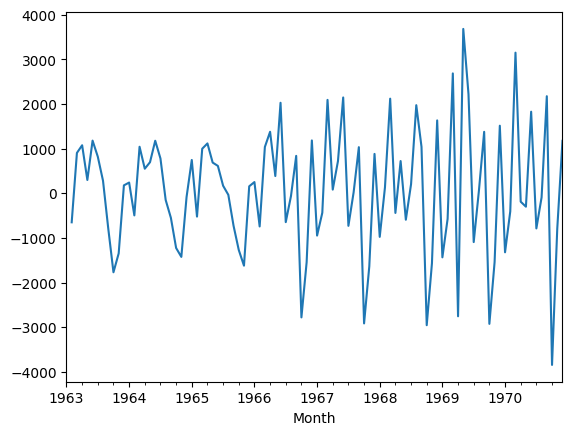

In [80]:
miles_df['MilesMM_diff_1'].plot()

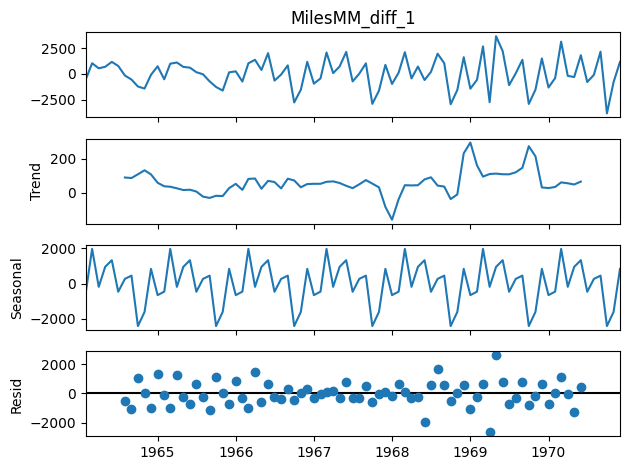

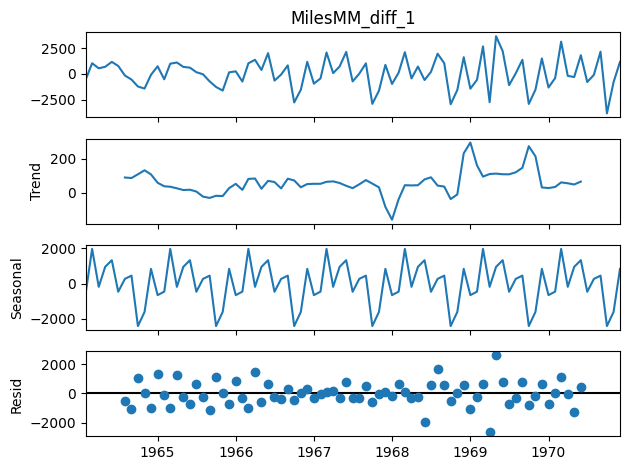

In [81]:
result_c=seasonal_decompose(miles_df.iloc[13:,4],model='additive')
result_c.plot()

see above their is no trend and seasonality

test train split for time series

In [82]:
temp_df=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\daily-min-temperatures.csv",parse_dates=[0])

In [83]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [84]:
temp_df.shape

(3650, 2)

In [85]:
temp_df.shape[0]

3650

In [86]:
train_size=int(temp_df.shape[0]*0.8)
train_size

2920

In [87]:
train=temp_df[0:train_size]
#train_1=temp_df.loc[0:train_size]

In [88]:
train

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
2915,1988-12-26,9.5
2916,1988-12-27,12.9
2917,1988-12-28,12.9
2918,1988-12-29,14.8


train_1
Date	Temp
0	1981-01-01	20.7
1	1981-01-02	17.9
2	1981-01-03	18.8
3	1981-01-04	14.6
4	1981-01-05	15.8
...	...	...
2916	1988-12-27	12.9
2917	1988-12-28	12.9
2918	1988-12-29	14.8
2919	1988-12-30	14.1
2920	1989-01-01	14.3

In [89]:
test=temp_df[train_size:]

In [90]:
train.shape

(2920, 2)

In [91]:
test.shape

(730, 2)

persistence model

In [92]:
df=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\daily-min-temperatures.csv",parse_dates=[0])

In [93]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [94]:
df['t']=df['Temp'].shift(1)

In [95]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [96]:
train,test=df[1:df.shape[0]-7],df[df.shape[0]-7:]

In [97]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [98]:
train_X,train_y=train['t'],train['Temp']
test_X,test_y=test['t'],test['Temp']

walk-forward validation

In [99]:
prediction=test_X.copy()

In [100]:
print(prediction)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [101]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_y,prediction)
mse

3.4228571428571413

<Axes: >

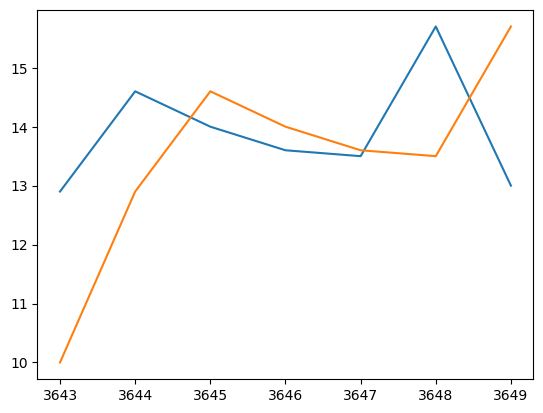

In [102]:
test_y.plot()
prediction.plot()

Autoregression model

In [103]:
df=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\daily-min-temperatures.csv",parse_dates=[0])

In [104]:
train,test=df.Temp[1:df.shape[0]-7],df.Temp[df.shape[0]-7:]

In [105]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [108]:
from statsmodels.tsa.ar_model import AutoReg

In [111]:
model=AutoReg(train,lags=1)
model_fit=model.fit()

No of lag variables

In [112]:
model_fit.k_ar

AttributeError: 'AutoRegResults' object has no attribute 'k_ar'

In [113]:
model_fit.params

const      2.517996
Temp.L1    0.774385
dtype: float64

arima model

In [115]:
df=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\shampoo.csv",parse_dates=[0])

C:\Users\shriv\AppData\Local\Temp\ipykernel_22760\2607267438.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv(r"D:\computer science\time series analysis\Time Series Analysis and Forecasting using Python\Data\shampoo.csv",parse_dates=[0])


In [116]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<Axes: >

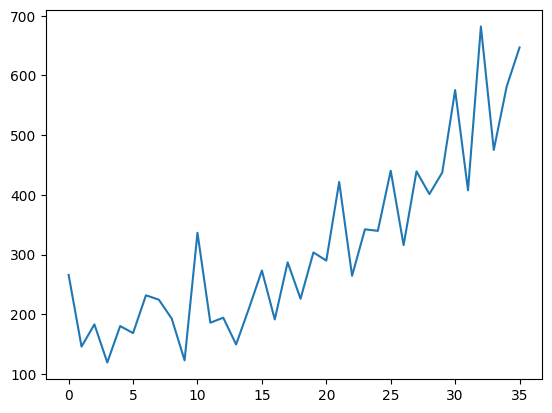

In [117]:
df['Sales'].plot()

In [118]:
#trend is polynomial
#d=2
#in arima we have three term p,d,q


autocorrelation plot

In [ ]:
from p